In [13]:
from numba import njit, prange
@njit(parallel=True)
def preprocess(user_id, items) :
    state = [[user_id]]
    for item in items :
        as_category = item.get_as_one_hot()
        state.append(as_category[0])  # Id
        state.append([as_category[1]])  # Price
        state.append(as_category[2])  # Color
    flat = itertools.chain.from_iterable(state)
    return list(flat)

@njit(parallel=True)
def replay(modele, target, memory, optimizer) :
    states, actions, next_states, rewards, dones = modele.sample(batch_size, memory)
    states = process_states(states)
    next_states = process_states(next_states)
    rewards = rewards.reshape((-1, 1))
    dones = dones.reshape((-1, 1))

    prediction = torch.tensor(
        (1 - dones) * (rewards + modele.gamma * np.amax(target(next_states).detach().numpy(), axis = 1)))

    real_value = modele(states)
    prediction = prediction.view(-1, 1)
    actions = actions.view(-1, 1)  # 32, 1
    pre = real_value.clone()
    print("Row ", row)
    for cpt, row in enumerate(real_value) :
        row[actions[cpt]] = prediction[cpt].float()
        real_value[cpt] = row

    loss = F.mse_loss(pre, real_value)
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

@njit(parallel=True)
def process_states(batch_states) :
    batch = []
    for states in batch_states :
        sub_batch = []
        user_id = states[0]
        for items in states[1] :
            sub_batch.append(preprocess(user_id, [items]))
        batch.append(sub_batch)
    return batch
import os
import torch
os.chdir("/Users/benjaminangelard/Thesis_Recommender_system")


In [17]:
def preprocess(user_id, items) :
    state = [[user_id]]
    for item in items :
        as_category = item.get_as_one_hot()
        state.append(as_category[0])  # Id
        state.append([as_category[1]])  # Price
        state.append(as_category[2])  # Color
    flat = itertools.chain.from_iterable(state)
    return list(flat)


def replay(modele, target, memory, optimizer) :
    states, actions, next_states, rewards, dones = modele.sample(batch_size, memory)
    states = process_states(states)
    next_states = process_states(next_states)
    rewards = rewards.reshape((-1, 1))
    dones = dones.reshape((-1, 1))

    prediction = torch.tensor(
        (1 - dones) * (rewards + modele.gamma * np.amax(target(next_states).detach().numpy(), axis = 1)))

    real_value = modele(states)
    prediction = prediction.view(-1, 1)
    actions = actions.view(-1, 1)  # 32, 1
    pre = real_value.clone()

    for cpt, row in enumerate(real_value) :
        row[actions[cpt]] = prediction[cpt].float()
        real_value[cpt] = row

    loss = F.mse_loss(pre, real_value)
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()


def process_states(batch_states) :
    batch = []
    for states in batch_states :
        sub_batch = []
        user_id = states[0]
        for items in states[1] :
            sub_batch.append(preprocess(user_id, [items]))
        batch.append(sub_batch)
    return batch
import os
import torch
os.chdir("/Users/benjaminangelard/Thesis_Recommender_system")


# Proba regard avec variation


/usr/local/lib/python3.7/site-packages/matplotlib/axes/_base.py:3152: UserWarning: Attempting to set identical left==right results
in singular transformations; automatically expanding.
left=0, right=0
  'left=%s, right=%s') % (left, right))


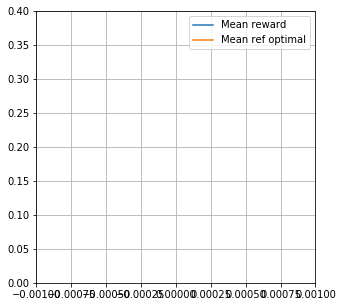

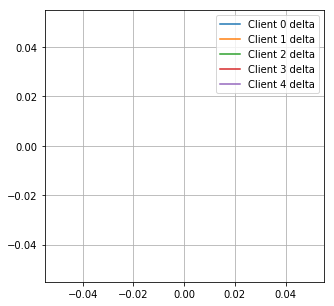

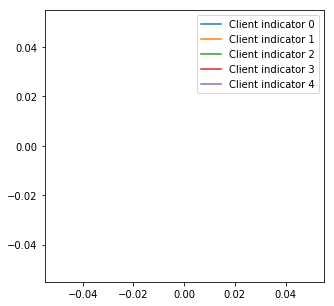

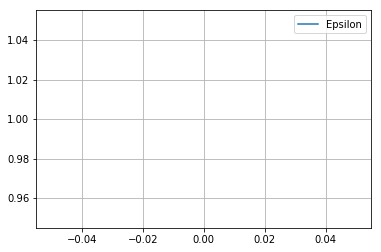

Episode 0 with reward : 0.022954476301338643 and epsilon
Row  tensor([[-0.3872],
        [-0.8026],
        [-0.2700],
        [-0.7244],
        [-0.3872]], grad_fn=<SelectBackward>)
Row  tensor([[-0.1854],
        [-0.1570],
        [-0.9376],
        [-0.4179],
        [-0.8385]], grad_fn=<SelectBackward>)
Row  tensor([[-0.3332],
        [-0.8654],
        [-0.5185],
        [-0.5291],
        [-0.5291]], grad_fn=<SelectBackward>)
Row  tensor([[-0.9255],
        [-0.3130],
        [-0.8111],
        [-0.1570],
        [-0.6207]], grad_fn=<SelectBackward>)
Row  tensor([[-0.8097],
        [-0.7271],
        [-0.2654],
        [-0.2696],
        [-0.5246]], grad_fn=<SelectBackward>)
Row  tensor([[-0.3333],
        [-0.3413],
        [-0.9620],
        [-0.4248],
        [-0.6207]], grad_fn=<SelectBackward>)
Row  tensor([[-0.2436],
        [-0.2436],
        [-0.9255],
        [-0.4179],
        [-0.9318]], grad_fn=<SelectBackward>)
Row  tensor([[-0.1854],
        [-0.1570],
        [-0

Row  tensor([[16.5305],
        [17.3816],
        [15.6059],
        [ 2.3550],
        [15.4758]], grad_fn=<SelectBackward>)
Row  tensor([[13.8422],
        [17.4286],
        [ 9.1779],
        [17.0884],
        [ 3.8383]], grad_fn=<SelectBackward>)
Row  tensor([[ 5.9052],
        [15.0168],
        [ 4.0083],
        [13.5191],
        [ 5.9052]], grad_fn=<SelectBackward>)
Row  tensor([[ 2.4738],
        [ 1.6622],
        [17.3133],
        [ 7.0074],
        [15.5376]], grad_fn=<SelectBackward>)
Row  tensor([[ 3.5663],
        [ 5.4663],
        [ 3.7681],
        [14.8064],
        [17.2459]], grad_fn=<SelectBackward>)
Row  tensor([[ 3.3012],
        [ 3.3012],
        [17.4537],
        [ 7.1532],
        [17.0884]], grad_fn=<SelectBackward>)
Row  tensor([[ 5.2864],
        [ 5.4632],
        [17.4972],
        [ 7.1681],
        [10.9020]], grad_fn=<SelectBackward>)
Row  tensor([[13.6321],
        [17.2237],
        [ 8.9592],
        [16.8763],
        [ 3.5663]], grad_fn=<S

Row  tensor([[ 1.4847],
        [16.8763],
        [11.5494],
        [ 2.3661],
        [13.7867]], grad_fn=<SelectBackward>)
Row  tensor([[ 5.9936],
        [15.0897],
        [ 4.1038],
        [13.5921],
        [ 5.9936]], grad_fn=<SelectBackward>)
Row  tensor([[ 5.1149],
        [ 5.2895],
        [17.3603],
        [ 7.0181],
        [10.7561]], grad_fn=<SelectBackward>)
Row  tensor([[ 5.1988],
        [15.5062],
        [ 9.0114],
        [ 9.2142],
        [ 9.2142]], grad_fn=<SelectBackward>)
Row  tensor([[ 3.9393],
        [ 5.7876],
        [ 4.1038],
        [15.0897],
        [17.5266]], grad_fn=<SelectBackward>)
Row  tensor([[ 2.4738],
        [ 1.6622],
        [17.3133],
        [ 7.0074],
        [15.5376]], grad_fn=<SelectBackward>)
Row  tensor([[17.5266],
        [17.4972],
        [ 4.6017],
        [15.7439],
        [17.4972]], grad_fn=<SelectBackward>)
Row  tensor([[ 3.6441],
        [ 5.5392],
        [ 3.8410],
        [14.8747],
        [17.3142]], grad_fn=<S

Row  tensor([[ 24.2653],
        [ 24.2653],
        [119.5207],
        [ 50.4103],
        [117.5118]], grad_fn=<SelectBackward>)
Row  tensor([[ 42.7414],
        [104.8734],
        [ 29.7910],
        [ 94.5377],
        [ 42.7414]], grad_fn=<SelectBackward>)
Row  tensor([[113.3624],
        [118.1005],
        [107.2952],
        [ 17.0016],
        [106.3128]], grad_fn=<SelectBackward>)
Row  tensor([[ 36.4560],
        [ 37.7207],
        [118.8341],
        [ 49.5282],
        [ 75.1135]], grad_fn=<SelectBackward>)
Row  tensor([[ 40.5582],
        [102.6903],
        [ 27.6079],
        [ 92.3545],
        [ 40.5582]], grad_fn=<SelectBackward>)
Row  tensor([[ 24.2653],
        [ 24.2653],
        [119.5207],
        [ 50.4103],
        [117.5118]], grad_fn=<SelectBackward>)
Row  tensor([[ 26.4032],
        [ 39.2030],
        [ 27.6079],
        [102.6903],
        [118.0653]], grad_fn=<SelectBackward>)
Row  tensor([[80.5504],
        [40.5582],
        [31.1372],
        [35.71

Row  tensor([[ 39.8348],
        [ 93.2393],
        [217.6827],
        [202.0113],
        [140.7535]], grad_fn=<SelectBackward>)
Row  tensor([[176.7062],
        [220.1123],
        [117.4900],
        [216.1783],
        [ 49.8393]], grad_fn=<SelectBackward>)
Row  tensor([[221.5585],
        [ 66.4329],
        [193.3713],
        [ 25.4074],
        [140.7535]], grad_fn=<SelectBackward>)
Row  tensor([[ 71.7459],
        [183.3053],
        [ 63.1691],
        [ 71.7309],
        [ 54.3525]], grad_fn=<SelectBackward>)
Row  tensor([[213.2878],
        [221.5850],
        [202.0113],
        [ 33.8412],
        [200.0725]], grad_fn=<SelectBackward>)
Row  tensor([[ 41.3392],
        [ 94.7437],
        [219.1871],
        [203.5157],
        [142.2579]], grad_fn=<SelectBackward>)
Row  tensor([[223.0629],
        [223.1211],
        [ 61.6647],
        [203.5157],
        [223.1211]], grad_fn=<SelectBackward>)
Row  tensor([[218.5497],
        [218.6079],
        [ 57.1515],
        [19

Row  tensor([[ 77.7323],
        [193.3713],
        [ 53.5302],
        [174.0379],
        [ 77.7323]], grad_fn=<SelectBackward>)
Row  tensor([[ 68.3332],
        [158.3053],
        [368.1604],
        [342.3001],
        [238.8067]], grad_fn=<SelectBackward>)
Row  tensor([[ 41.1733],
        [370.8778],
        [260.5801],
        [ 64.5360],
        [308.2205]], grad_fn=<SelectBackward>)
Row  tensor([[ 56.1879],
        [152.8704],
        [ 56.3836],
        [287.1922],
        [306.5261]], grad_fn=<SelectBackward>)
Row  tensor([[ 56.1879],
        [152.8704],
        [ 56.3836],
        [287.1922],
        [306.5261]], grad_fn=<SelectBackward>)
Row  tensor([[117.0144],
        [120.8488],
        [374.8116],
        [157.9943],
        [238.8067]], grad_fn=<SelectBackward>)
Row  tensor([[114.3279],
        [302.7855],
        [ 99.7939],
        [114.2969],
        [ 84.9165]], grad_fn=<SelectBackward>)
Row  tensor([[ 72.8810],
        [308.2205],
        [330.3607],
        [13

Row  tensor([[ 41.1733],
        [370.8778],
        [260.5801],
        [ 64.5360],
        [308.2205]], grad_fn=<SelectBackward>)
Row  tensor([[ 75.5984],
        [310.9379],
        [333.0782],
        [142.2496],
        [208.5429]], grad_fn=<SelectBackward>)
Row  tensor([[334.1242],
        [113.2470],
        [305.5030],
        [361.1854],
        [311.9611]], grad_fn=<SelectBackward>)
Row  tensor([[ 75.5984],
        [310.9379],
        [333.0782],
        [142.2496],
        [208.5429]], grad_fn=<SelectBackward>)
Row  tensor([[372.0185],
        [110.5295],
        [324.9258],
        [ 41.0617],
        [236.0892]], grad_fn=<SelectBackward>)
Row  tensor([[ 84.9165],
        [125.3195],
        [ 88.6213],
        [324.9258],
        [372.0185]], grad_fn=<SelectBackward>)
Row  tensor([[ 70.9716],
        [ 70.9716],
        [369.3010],
        [152.8704],
        [362.7254]], grad_fn=<SelectBackward>)
Row  tensor([[ 58.9053],
        [ 41.0617],
        [372.1597],
        [15

Row  tensor([[412.0001],
        [213.9057],
        [167.1077],
        [189.9928],
        [108.5280]], grad_fn=<SelectBackward>)
Row  tensor([[575.0059],
        [596.0356],
        [545.3118],
        [ 96.9438],
        [539.9742]], grad_fn=<SelectBackward>)
Row  tensor([[582.3857],
        [170.6910],
        [508.7238],
        [ 60.8704],
        [368.6472]], grad_fn=<SelectBackward>)
Row  tensor([[486.0849],
        [600.4261],
        [327.1977],
        [589.7444],
        [148.1632]], grad_fn=<SelectBackward>)
Row  tensor([[595.8383],
        [595.9419],
        [167.1077],
        [545.3118],
        [595.9419]], grad_fn=<SelectBackward>)
Row  tensor([[120.9764],
        [491.6689],
        [526.6606],
        [225.9962],
        [330.6544]], grad_fn=<SelectBackward>)
Row  tensor([[102.6077],
        [255.0834],
        [102.9484],
        [467.2924],
        [497.5558]], grad_fn=<SelectBackward>)
Row  tensor([[ 93.6393],
        [ 65.3546],
        [587.0672],
        [24

Row  tensor([[407.5159],
        [209.4215],
        [162.6235],
        [185.5086],
        [104.0438]], grad_fn=<SelectBackward>)
Row  tensor([[108.9417],
        [250.5992],
        [580.7761],
        [540.8276],
        [377.6156]], grad_fn=<SelectBackward>)
Row  tensor([[ 99.5596],
        [373.1315],
        [531.0059],
        [142.2927],
        [134.7107]], grad_fn=<SelectBackward>)
Row  tensor([[561.5533],
        [582.5831],
        [531.8593],
        [ 83.4913],
        [526.5217]], grad_fn=<SelectBackward>)
Row  tensor([[513.2080],
        [472.6323],
        [134.7107],
        [140.4509],
        [315.6737]], grad_fn=<SelectBackward>)
Row  tensor([[595.8383],
        [595.9419],
        [167.1077],
        [545.3118],
        [595.9419]], grad_fn=<SelectBackward>)
Row  tensor([[591.3541],
        [179.6594],
        [517.6922],
        [ 69.8388],
        [377.6156]], grad_fn=<SelectBackward>)
Row  tensor([[756.1619],
        [159.8631],
        [487.4867],
        [15

Row  tensor([[175.9946],
        [384.8288],
        [871.2441],
        [813.1627],
        [572.1959]], grad_fn=<SelectBackward>)
Row  tensor([[147.8694],
        [551.5753],
        [784.5002],
        [211.3922],
        [199.8728]], grad_fn=<SelectBackward>)
Row  tensor([[153.0920],
        [699.9576],
        [751.6503],
        [308.3195],
        [462.8709]], grad_fn=<SelectBackward>)
Row  tensor([[220.4935],
        [314.5428],
        [228.9300],
        [779.1445],
        [887.0769]], grad_fn=<SelectBackward>)
Row  tensor([[199.8728],
        [293.9222],
        [208.3093],
        [758.5238],
        [866.4563]], grad_fn=<SelectBackward>)
Row  tensor([[866.4563],
        [866.5522],
        [234.2936],
        [792.5421],
        [866.5522]], grad_fn=<SelectBackward>)
Row  tensor([[180.5862],
        [727.4517],
        [779.1445],
        [335.8137],
        [490.3651]], grad_fn=<SelectBackward>)
Row  tensor([[310.2879],
        [765.3974],
        [215.1829],
        [68

Row  tensor([[1128.1523],
        [1139.4969],
        [ 387.3495],
        [ 621.2778],
        [ 158.5250]], grad_fn=<SelectBackward>)
Row  tensor([[ 369.7635],
        [1081.3602],
        [ 637.1372],
        [ 649.5301],
        [ 649.5301]], grad_fn=<SelectBackward>)
Row  tensor([[1058.5002],
        [ 217.7126],
        [ 679.5303],
        [ 205.2487],
        [ 448.9636]], grad_fn=<SelectBackward>)
Row  tensor([[871.7266],
        [458.9637],
        [361.7477],
        [408.9631],
        [239.7553]], grad_fn=<SelectBackward>)
Row  tensor([[ 119.2813],
        [1200.5530],
        [ 841.7263],
        [ 198.3133],
        [ 998.4452]], grad_fn=<SelectBackward>)
Row  tensor([[378.9629],
        [998.4452],
        [331.7475],
        [379.7636],
        [283.0783]], grad_fn=<SelectBackward>)
Row  tensor([[ 220.7854],
        [ 514.7632],
        [1200.5530],
        [1119.4968],
        [ 779.5776]], grad_fn=<SelectBackward>)
Row  tensor([[ 996.8541],
        [1232.8680],
    

Row  tensor([[ 210.7853],
        [ 504.7632],
        [1190.5527],
        [1109.4967],
        [ 769.5775]], grad_fn=<SelectBackward>)
Row  tensor([[ 976.8539],
        [1212.8679],
        [ 643.8884],
        [1190.5527],
        [ 273.0783]], grad_fn=<SelectBackward>)
Row  tensor([[ 187.7123],
        [ 504.7632],
        [ 188.3132],
        [ 947.9285],
        [1010.7167]], grad_fn=<SelectBackward>)
Row  tensor([[1071.4170],
        [ 986.8541],
        [ 283.0783],
        [ 295.1426],
        [ 659.5302]], grad_fn=<SelectBackward>)
Row  tensor([[ 283.0783],
        [ 416.0324],
        [ 295.1426],
        [1071.4170],
        [1222.6782]], grad_fn=<SelectBackward>)
Row  tensor([[ 230.7854],
        [ 524.7633],
        [1210.5530],
        [1129.4968],
        [ 789.5776]], grad_fn=<SelectBackward>)
Row  tensor([[ 119.2813],
        [1200.5530],
        [ 841.7263],
        [ 198.3133],
        [ 998.4452]], grad_fn=<SelectBackward>)
Row  tensor([[ 230.7854],
        [ 524.7

Row  tensor([[1748.6583],
        [1748.7428],
        [ 506.4886],
        [1604.1940],
        [1748.7428]], grad_fn=<SelectBackward>)
Row  tensor([[ 305.2782],
        [ 747.4302],
        [ 306.2212],
        [1366.5934],
        [1453.6986]], grad_fn=<SelectBackward>)
Row  tensor([[1510.0436],
        [1391.8933],
        [ 410.2436],
        [ 427.1494],
        [ 935.2353]], grad_fn=<SelectBackward>)
Row  tensor([[ 515.1298],
        [1379.6688],
        [ 449.4946],
        [ 516.6339],
        [ 381.7466]], grad_fn=<SelectBackward>)
Row  tensor([[1705.9131],
        [1705.9972],
        [ 463.7431],
        [1561.4486],
        [1705.9972]], grad_fn=<SelectBackward>)
Row  tensor([[ 279.5172],
        [1074.2693],
        [1531.7544],
        [ 406.0324],
        [ 381.7466]], grad_fn=<SelectBackward>)
Row  tensor([[ 381.7466],
        [ 567.2665],
        [ 398.6524],
        [1481.5466],
        [1691.6644]], grad_fn=<SelectBackward>)
Row  tensor([[ 336.5112],
        [1131.2

Row  tensor([[ 477.7416],
        [1951.0920],
        [2089.6621],
        [ 898.5890],
        [1312.4692]], grad_fn=<SelectBackward>)
Row  tensor([[ 288.1399],
        [2355.2119],
        [1670.9421],
        [ 441.0394],
        [1970.8988]], grad_fn=<SelectBackward>)
Row  tensor([[1984.0397],
        [ 380.4792],
        [1263.2606],
        [ 356.3698],
        [ 822.5858]], grad_fn=<SelectBackward>)
Row  tensor([[ 533.3069],
        [ 533.3069],
        [2397.9360],
        [1045.6824],
        [2355.2119]], grad_fn=<SelectBackward>)
Row  tensor([[ 462.9048],
        [1552.6063],
        [2178.8706],
        [ 637.0311],
        [ 602.8904]], grad_fn=<SelectBackward>)
Row  tensor([[2003.8466],
        [ 400.2860],
        [1283.0674],
        [ 376.1766],
        [ 842.3925]], grad_fn=<SelectBackward>)
Row  tensor([[ 208.9109],
        [2275.9846],
        [1591.7150],
        [ 361.8122],
        [1891.6716]], grad_fn=<SelectBackward>)
Row  tensor([[ 882.0061],
        [2109.4

Row  tensor([[ 726.6297],
        [1911.4784],
        [ 636.4333],
        [ 728.8666],
        [ 543.4700]], grad_fn=<SelectBackward>)
Row  tensor([[ 768.4801],
        [2127.3477],
        [1277.8319],
        [1302.8741],
        [1302.8741]], grad_fn=<SelectBackward>)
Row  tensor([[1243.4537],
        [1823.4502],
        [ 964.8374],
        [ 383.6776],
        [2030.2415]], grad_fn=<SelectBackward>)
Row  tensor([[1263.2606],
        [ 266.7864],
        [1911.4784],
        [ 438.1281],
        [ 543.4700]], grad_fn=<SelectBackward>)
Row  tensor([[ 420.0928],
        [ 306.4000],
        [2379.5098],
        [1025.8756],
        [2178.4941]], grad_fn=<SelectBackward>)
Row  tensor([[ 543.4700],
        [ 797.9604],
        [ 566.9164],
        [2050.0483],
        [2338.5156]], grad_fn=<SelectBackward>)
Row  tensor([[ 380.4792],
        [ 266.7864],
        [2339.8960],
        [ 986.2620],
        [2138.8806]], grad_fn=<SelectBackward>)
Row  tensor([[ 709.0598],
        [ 729.8

KeyboardInterrupt: 

In [18]:

#torch.set_default_tensor_type('torch.cuda.FloatTensor')
import numpy as np
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torch.distributions import Categorical
import matplotlib.pyplot as plt
from IPython.display import clear_output
from Environment.BanditEnvironment_stationary_WithRegeneration import BanditEnvironment_regeneration as env_generator
from Tools import Logger
from collections import deque
from keras.utils import to_categorical
import itertools

n_feature_item = 3
n_feature_client = 3
range_price = 100
range_color = 5
n_client = 5
n_item = 5
hidden_layer_size = 64
hidden_layer_2_size = 32
learning_rate = 5e-2
log_delay = 50
batch_size = 256
target_update = 30
epsilon_decay = 500
catalog_size = 50
input_state_size = catalog_size + 1 + range_color + 1 # ID - price - range_color + UID
GAMMA = 0.99
memory = deque(maxlen = 10000)

class DQN(nn.Module) :
    def __init__(self, gamma) :
        super(DQN, self).__init__()
        self.create_model()
        self.gamma = gamma

    def create_model(self) :
        self.dense1 = nn.Linear(input_state_size, hidden_layer_size)
        self.dense2 = nn.Linear(hidden_layer_size, hidden_layer_2_size)
        self.dense3 = nn.Linear(hidden_layer_2_size, 1)

    def forward(self, x) :
        client_ID = torch.from_numpy(np.array(x)).float()
        out_1 = torch.relu(self.dense1(client_ID))
        out_2 = torch.relu(self.dense2(out_1))
        return self.dense3(out_2)

    def remember(self, memory, state, action, next_state, reward, done) :
        memory.append((state, action, next_state, reward, done))

    def sample(self, batch_size, memory) :
        indices = np.random.choice(len(memory), batch_size, replace = False)
        states, actions, next_states, rewards, dones = zip(*[memory[idx] for idx in indices])
        return np.array(states), torch.from_numpy(np.array(actions)), np.array(next_states), np.array(rewards), np.array(dones)

    def choose_action(self, state, epsilon) :

        coin_toss = np.random.random()
        if coin_toss < epsilon :
            return np.random.randint(n_item)
        else :
            user_id = state[0]
            items = state[1]
            scores = []
            for item in items:
                current_state = preprocess(user_id = user_id, items = [item])
                score = self(current_state).item()
                scores.append(score)
            return np.argmax(scores)

    # Return state





class Runner() :
    def __init__(self, env, n_episode = 10000) :
        self.model = DQN(gamma = GAMMA)
        self.target = DQN(gamma = GAMMA)
        self.target.load_state_dict(self.model.state_dict())
        self.target.eval()
        #  self.model.cuda()
        self.env = env
        self.optimizer = optim.Adam(self.model.parameters(), lr = learning_rate)
        self.memory = []
        self.gamma = GAMMA
        self.log_delay = log_delay
        self.n_episode = n_episode
        self.batch_size = batch_size
        self.epsilon = np.finfo(np.float32).eps.item()
        self.logger = Logger.Logger(n_client, env, 1000000)
        self.memory_loss = []
        self.epsilon_explo = 1.0
        self.epsilon_origin = 1.0

    def run(self) :
        print(self.model)
        epsilon_log = []
        cumulator = []
        ep_reward = 0
        last_reward = 0
        ep_reward_cumul = []
        mean_delta = []
        mean_log = []
        delay = 20
        for i_episode in range(self.n_episode) :
            client_id, items, should_reset = self.env.reset()
           
            ep_reward_cumul.append(ep_reward)
            mean_delta.append(np.mean(cumulator))
            mean_log.append(np.mean(ep_reward_cumul))
            self.epsilon_explo = max(self.epsilon_origin - self.epsilon_origin * i_episode / epsilon_decay, 0.1)
            epsilon_log.append(self.epsilon_explo)
            if i_episode % self.log_delay == 0 :
                clear_output(True)
                self.logger.plot()
                plt.plot(epsilon_log, label = "Epsilon")
                plt.grid()
                plt.legend()
                plt.show() 
            if should_reset:
                self.logger.reset(n_client)

            ep_reward = 0
            for t in range(delay) :  # Collect trajectoire

                state = [client_id, items]
                action = self.model.choose_action(epsilon = self.epsilon_explo, state = state)
                tmp_for_random = env.current_client
                client_id_next, items, reward = env.step_mono_recommendation(action)
                env.current_client = tmp_for_random
                _, _, reward_random = env.step_mono_recommendation(np.random.randint(n_item))
                env.current_client = client_id_next # Modif temporaire pour comparer le random
                ep_reward += reward
                self.logger.add_reward_client(reward, client_id, reward_random)
                next_state = [client_id_next, items]
                self.model.remember(memory = memory, state = state, next_state = next_state, \
                                    action = action, done = not (t < (delay - 1)), reward = reward)
                client_id = client_id_next
                if t % target_update == 0 :
                    self.target.load_state_dict(self.model.state_dict())
            if len(memory) > batch_size:
                replay(modele = self.model, target = self.target, optimizer = self.optimizer, memory = memory)
            if i_episode % self.log_delay == 0 :
                print("Episode {} with reward : {} and epsilon".format(i_episode, ep_reward, self.epsilon))


if __name__ == '__main__' :
    env = env_generator(n_client = n_client, n_item = n_item, nb_color = range_color, range_price = range_price)
    runner = Runner(env)
    runner.run()

# TODO :
# Si un utilisateur a eut une bonne recommendation sa "satisfaction augmente" donc plus de chance d'achat, bonus en % sur chance d'achat
# Essayer https://arxiv.org/pdf/1810.12027.pdf

In [ ]:

real_value[0][1] = 1
real_value[0]

# Experience replay

In [13]:
def preprocess(user_id, items) :
    state = [[user_id]]
    for item in items :
        as_category = item.get_as_one_hot()
        state.append(as_category[0])  # Id
        state.append([as_category[1]])  # Price
        state.append(as_category[2])  # Color
    flat = itertools.chain.from_iterable(state)
    return list(flat)


def replay(modele, target, memory, optimizer) :
    states, actions, next_states, rewards, dones, indices = modele.sample(batch_size, memory)
    states = process_states(states)
    next_states = process_states(next_states)
    rewards = rewards.reshape((-1, 1))
    dones = dones.reshape((-1, 1))

    prediction = torch.tensor(
        (1 - dones) * (rewards + modele.gamma * np.amax(target(next_states).detach().numpy(), axis = 1)))

    real_value = modele(states)
    prediction = prediction.view(-1, 1)
    actions = actions.view(-1, 1)  # 32, 1
    pre = real_value.clone()

    for cpt, row in enumerate(real_value) :
        row[actions[cpt].long()] = prediction[cpt].float()
        real_value[cpt] = row

    loss = F.mse_loss(pre, real_value)
    # Tricks to only get the priorities and not the zeros
    memory.update_priorities(indices, [np.max((pre - real_value).detach().squeeze().abs().cpu().numpy())])
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()


def process_states(batch_states) :
    batch = []
    for states in batch_states :
        sub_batch = []
        user_id = states[0]
        for items in states[1] :
            sub_batch.append(preprocess(user_id, [items]))
        batch.append(sub_batch)
    return batch
import os
import torch
os.chdir("/Users/benjaminangelard/Thesis_Recommender_system")


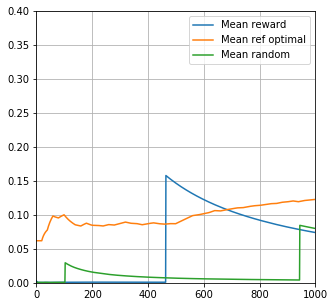

KeyboardInterrupt: 

In [14]:

#torch.set_default_tensor_type('torch.cuda.FloatTensor')
import numpy as np
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torch.distributions import Categorical
import matplotlib.pyplot as plt
from IPython.display import clear_output
from Environment.BanditEnvironment_stationary_WithRegeneration import BanditEnvironment_regeneration as env_generator
from Tools import Logger
from collections import deque
from keras.utils import to_categorical
import itertools
from Tools.Prioritized_experience_replay import PrioritizedReplayMemory
n_feature_item = 3
n_feature_client = 3
range_price = 100
range_color = 5
n_client = 5
n_item = 5
hidden_layer_size = 64
hidden_layer_2_size = 32
learning_rate = 5e-2
log_delay = 50
batch_size = 32
target_update = 30
epsilon_decay = 500
catalog_size = 50
input_state_size = catalog_size + 1 + range_color + 1 # ID - price - range_color + UID
GAMMA = 0.99
memory = PrioritizedReplayMemory(100000, beta_annealing = 9000)#00)

class DQN(nn.Module) :
    def __init__(self, gamma) :
        super(DQN, self).__init__()
        self.create_model()
        self.gamma = gamma

    def create_model(self) :
        self.dense1 = nn.Linear(input_state_size, hidden_layer_size)
        self.dense2 = nn.Linear(hidden_layer_size, hidden_layer_2_size)
        self.dense3 = nn.Linear(hidden_layer_2_size, 1)

    def forward(self, x) :
        client_ID = torch.from_numpy(np.array(x)).float()
        out_1 = torch.relu(self.dense1(client_ID))
        out_2 = torch.relu(self.dense2(out_1))
        return self.dense3(out_2)

    def remember(self, memory, state, action, next_state, reward, done) :
        memory.remember((state, action, reward, next_state, done))

    def sample(self, batch_size, memory) :
        transitions, indices, weights = memory.sample(batch_size)
        batch_state, batch_action, batch_reward, batch_next_state, dones = zip(*transitions)
        return np.array(batch_state), torch.Tensor(batch_action), np.array(batch_next_state), np.array(batch_reward), np.array(dones), indices


    def choose_action(self, state, epsilon) :

        coin_toss = np.random.random()
        if coin_toss < epsilon :
            return np.random.randint(n_item)
        else :
            user_id = state[0]
            items = state[1]
            scores = []
            for item in items:
                current_state = preprocess(user_id = user_id, items = [item])
                score = self(current_state).item()
                scores.append(score)
            return np.argmax(scores)

    # Return state





class Runner() :
    def __init__(self, env, n_episode = 10000) :
        self.model = DQN(gamma = GAMMA)
        self.target = DQN(gamma = GAMMA)
        self.target.load_state_dict(self.model.state_dict())
        self.target.eval()
        #  self.model.cuda()
        self.env = env
        self.optimizer = optim.Adam(self.model.parameters(), lr = learning_rate)
        self.memory = []
        self.gamma = GAMMA
        self.log_delay = log_delay
        self.n_episode = n_episode
        self.batch_size = batch_size
        self.epsilon = np.finfo(np.float32).eps.item()
        self.logger = Logger.Logger(n_client, env, 1000000)
        self.memory_loss = []
        self.epsilon_explo = 1.0
        self.epsilon_origin = 1.0

    def run(self) :
        print(self.model)
        epsilon_log = []
        cumulator = []
        ep_reward = 0
        last_reward = 0
        ep_reward_cumul = []
        mean_delta = []
        mean_log = []
        delay = 20
        for i_episode in range(self.n_episode) :
            client_id, items, should_reset = self.env.reset()
           
            ep_reward_cumul.append(ep_reward)
            mean_delta.append(np.mean(cumulator))
            mean_log.append(np.mean(ep_reward_cumul))
            self.epsilon_explo = max(self.epsilon_origin - self.epsilon_origin * i_episode / epsilon_decay, 0.1)
            epsilon_log.append(self.epsilon_explo)
            if i_episode % self.log_delay == 0 :
                clear_output(True)
                self.logger.plot()
                plt.plot(epsilon_log, label = "Epsilon")
                plt.grid()
                plt.legend()
                plt.show() 
            if should_reset:
                self.logger.reset(n_client)

            ep_reward = 0
            for t in range(delay) :  # Collect trajectoire

                state = [client_id, items]
                action = self.model.choose_action(epsilon = self.epsilon_explo, state = state)
                tmp_for_random = env.current_client
                client_id_next, items, reward = env.step_mono_recommendation(action)
                env.current_client = tmp_for_random
                _, _, reward_random = env.step_mono_recommendation(np.random.randint(n_item))
                env.current_client = client_id_next # Modif temporaire pour comparer le random
                ep_reward += reward
                self.logger.add_reward_client(reward, client_id, reward_random)
                next_state = [client_id_next, items]
                self.model.remember(memory = memory, state = state, next_state = next_state, \
                                    action = action, done = not (t < (delay - 1)), reward = reward)
                client_id = client_id_next
                if t % target_update == 0 :
                    self.target.load_state_dict(self.model.state_dict())
            if len(memory) > batch_size:
                replay(modele = self.model, target = self.target, optimizer = self.optimizer, memory = memory)
            if i_episode % self.log_delay == 0 :
                print("Episode {} with reward : {} and epsilon".format(i_episode, ep_reward, self.epsilon))


if __name__ == '__main__' :
    env = env_generator(n_client = n_client, n_item = n_item, nb_color = range_color, range_price = range_price)
    runner = Runner(env)
    runner.run()

# TODO :
# Si un utilisateur a eut une bonne recommendation sa "satisfaction augmente" donc plus de chance d'achat, bonus en % sur chance d'achat
# Essayer https://arxiv.org/pdf/1810.12027.pdf

In [8]:
np.array([ 1., 2., 3., 1.]) + 4


array([5., 6., 7., 5.])